In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: xlabel='Pregnancies', ylabel='Count'>

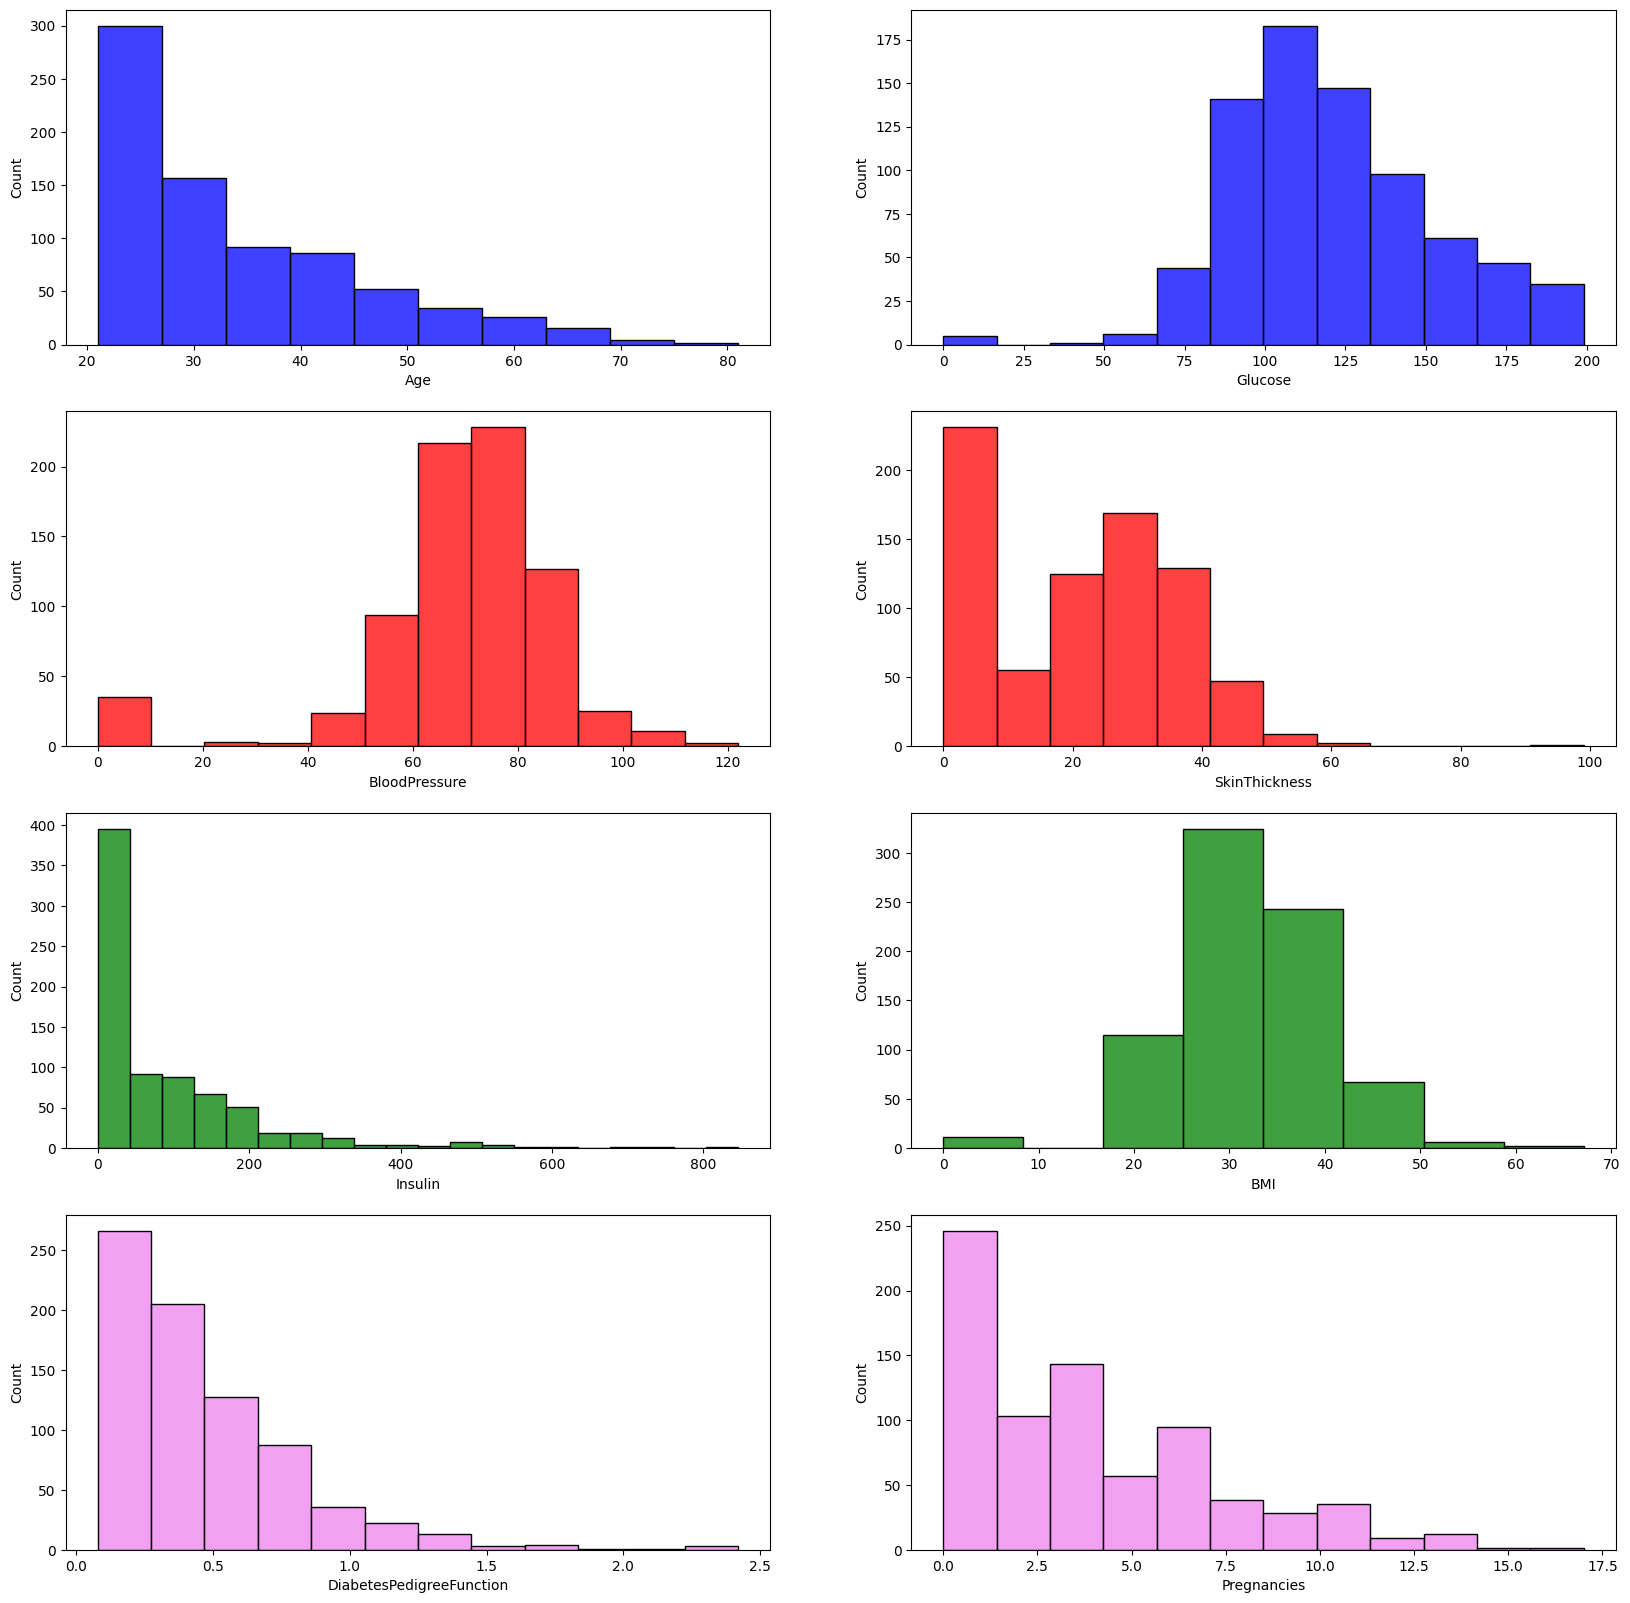

In [7]:
fig,ax = plt.subplots(4,2, figsize=(20,20))
sns.histplot(df['Age'], bins=10, ax=ax[0,0], color="blue")
sns.histplot(df['Glucose'], bins=12, ax=ax[0,1], color="blue")
sns.histplot(df['BloodPressure'], bins=12, ax=ax[1,0], color="red")
sns.histplot(df['SkinThickness'], bins=12, ax=ax[1,1], color="red")
sns.histplot(df['Insulin'], bins=20, ax=ax[2,0], color="green")
sns.histplot(df['BMI'], bins=8, ax=ax[2,1], color="green")
sns.histplot(df['DiabetesPedigreeFunction'], bins=12, ax=ax[3,0], color="violet")
sns.histplot(df['Pregnancies'], bins=12, ax=ax[3,1], color="violet")

In [8]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

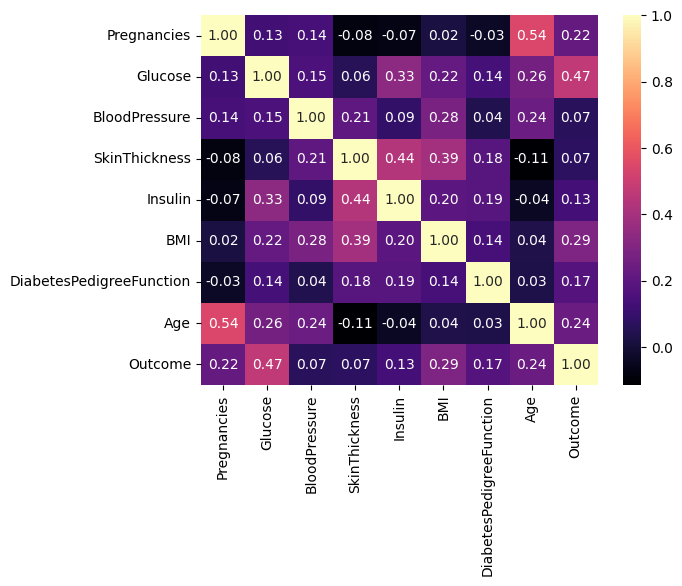

In [9]:
sns.heatmap(df.corr(),annot=True, fmt = '.2f', cmap='magma')

In [10]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']] = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].replace(0, np.NaN)

In [12]:
df.isna().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [13]:
def deal_with_Nan(column):   
    temp = df[df[column].notnull()]
    temp = temp[[column, 'Outcome']].groupby(['Outcome'])[[column]].median().reset_index()
    return temp

In [14]:
columns = df.iloc[:,:-1]
columns 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63
764,2.0,122.0,70.0,27.0,NaN,36.8,0.340,27
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1.0,126.0,60.0,NaN,NaN,30.1,0.349,47


In [15]:
for column in columns: # dealing with missing values
    deal_with_Nan(column)
    df.loc[(df['Outcome'] == 0 ) & (df[column].isna()), column] = deal_with_Nan(column)[column][0]
    df.loc[(df['Outcome'] == 1 ) &  (df[column].isna()),column] = deal_with_Nan(column)[column][1]
    

In [16]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [17]:
for column in df.columns: # function for detecting outliers
    Q3 = df[column].quantile(0.75)
    Q1 = df[column].quantile(0.25)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    if df[(df[column] > upper_bound)].any(axis=None):
        print(column, "yes")
    else:
        print(column, "no")

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


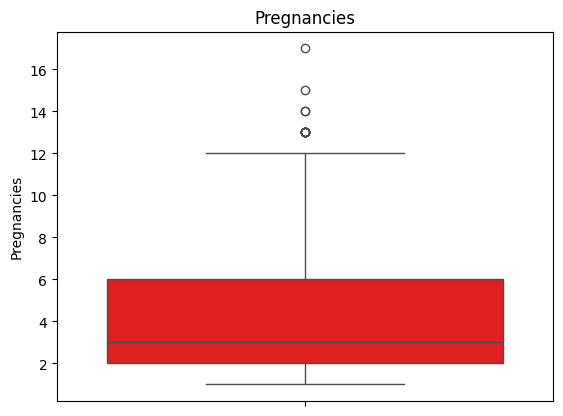

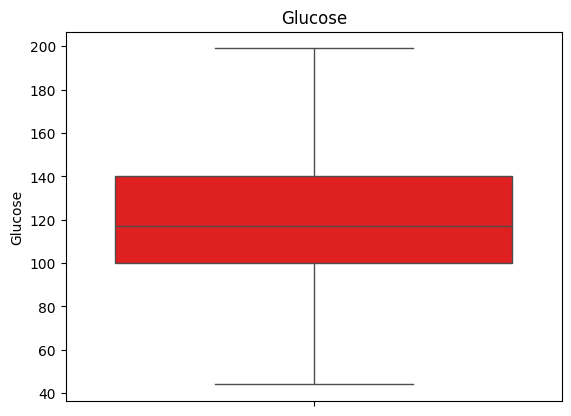

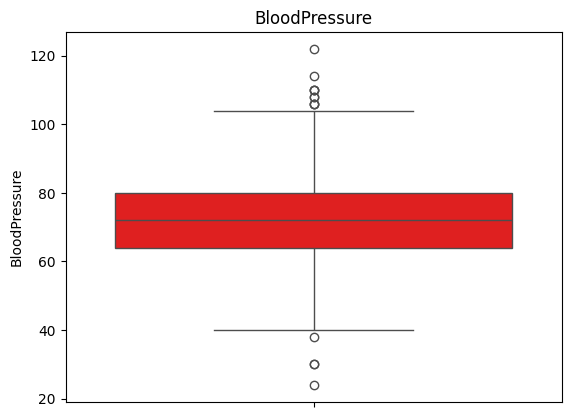

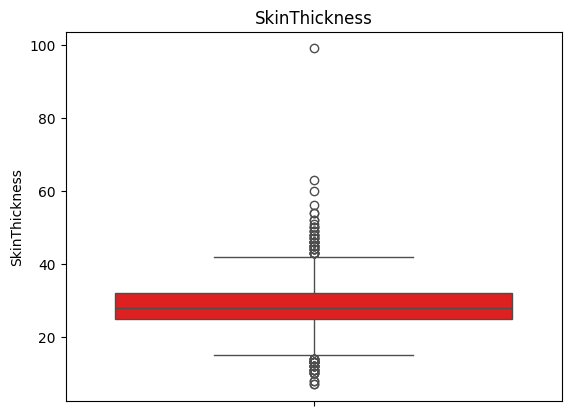

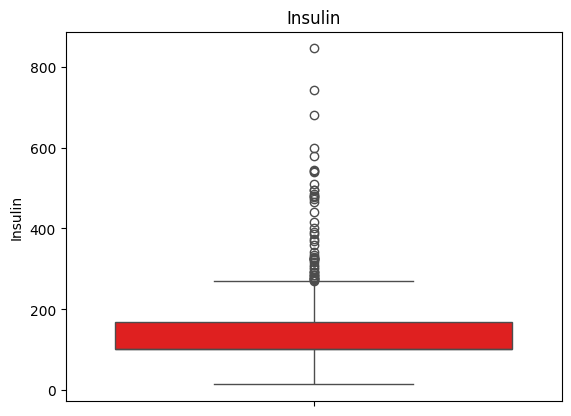

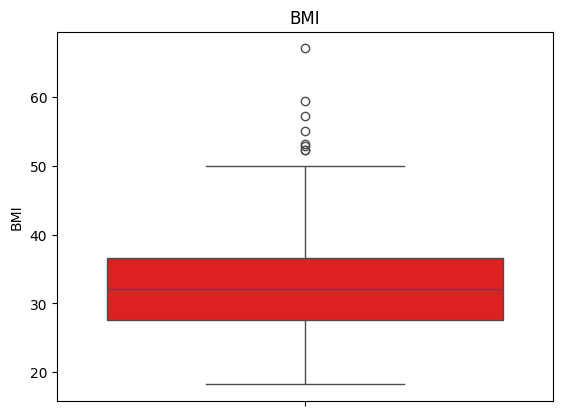

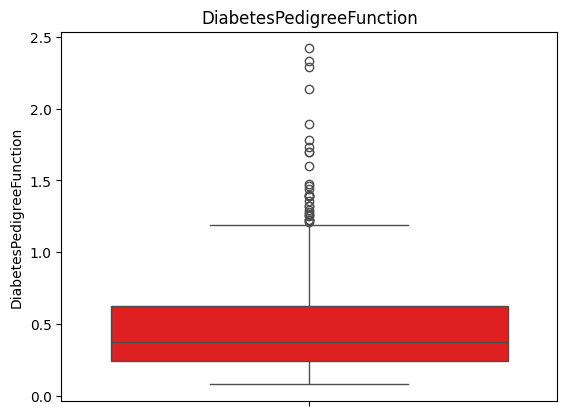

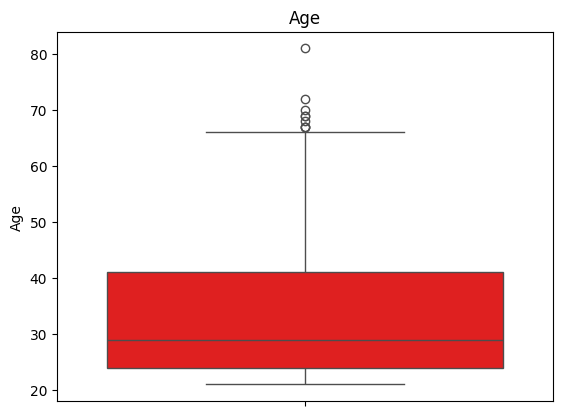

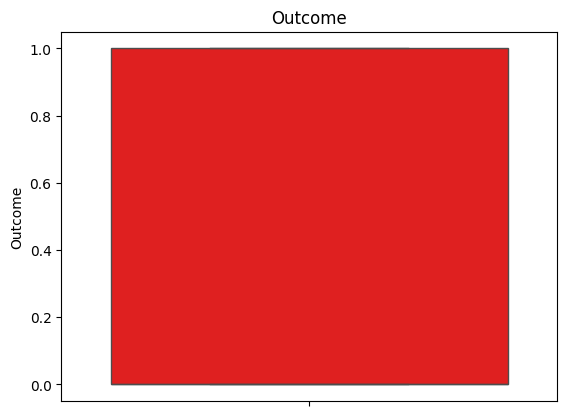

In [18]:
for column in df.columns: # plots for detecting outliers
    plt.figure()
    sns.boxplot(df[column], color ="red")
    plt.title(column)
    plt.show()

In [19]:
def clean_outliers(data,column): # function for clearing outliers
    Q3 = df[column].quantile(0.75)
    Q1 = df[column].quantile(0.25)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    lower_filter = lower_bound < data[column]
    upper_filter = upper_bound > data[column]
    cleaned_data = lower_filter & upper_filter 
    data = data[cleaned_data]
    ##print("{} of dataset after column {}".format(data.shape, columns))
    return data

In [20]:
df.shape

(768, 9)

In [21]:
df_clean = df.copy() # clearing outliers (deleting them)
for c in df.columns:
    df_clean = clean_outliers(df_clean,c)
df_clean.shape

(573, 9)

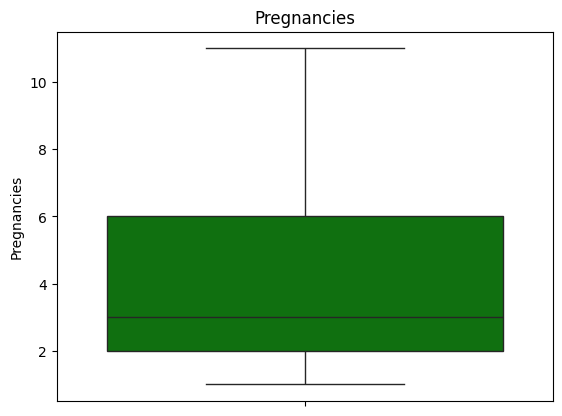

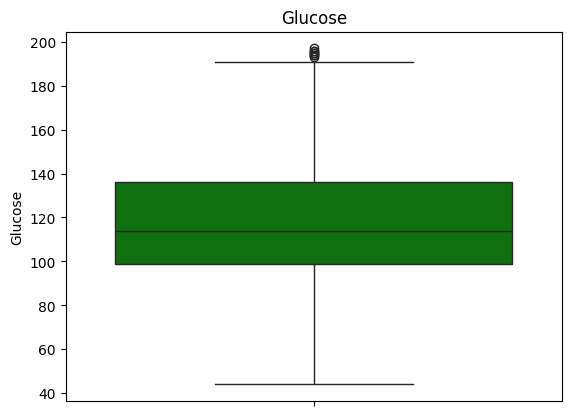

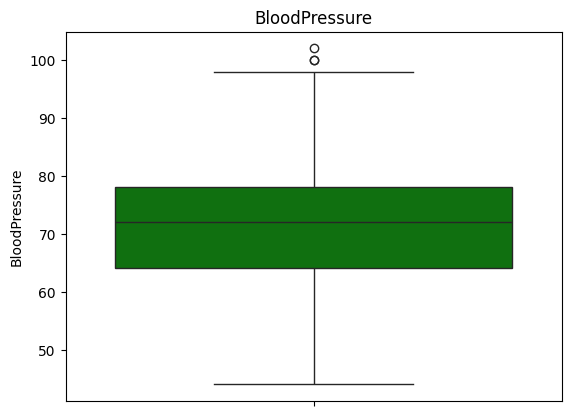

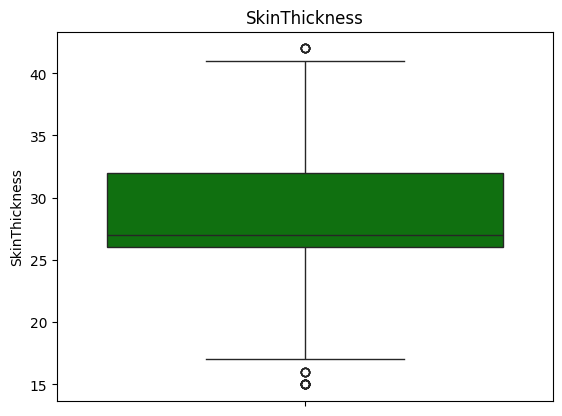

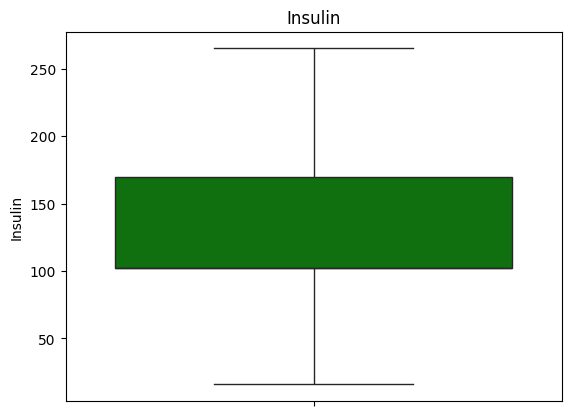

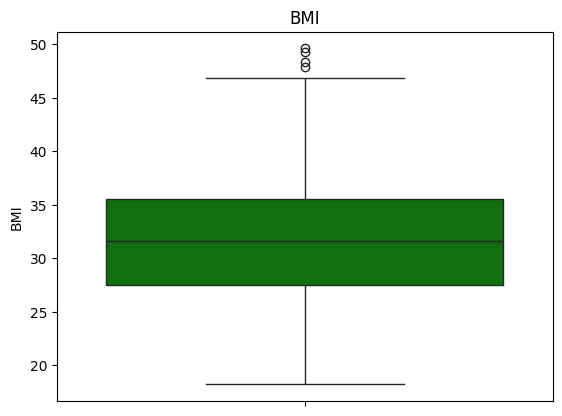

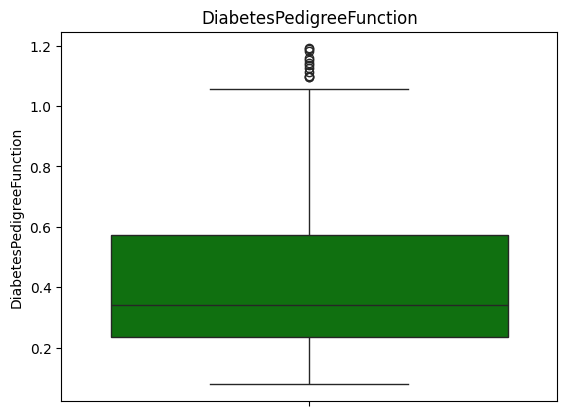

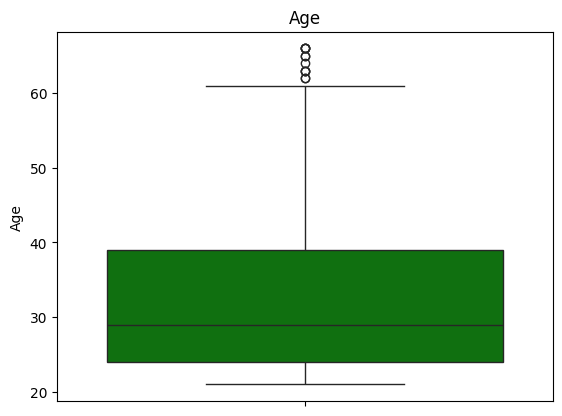

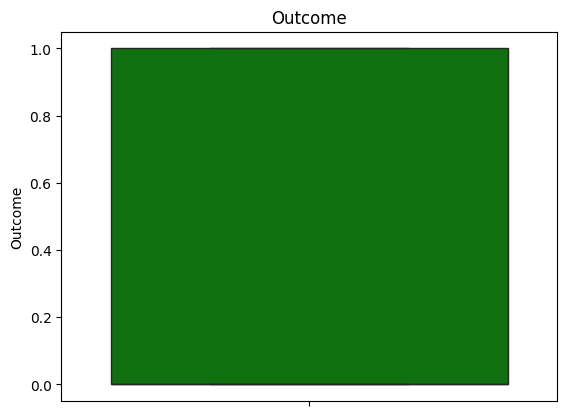

In [22]:
for column in df_clean.columns: # plots for cleared columns
    plt.figure()
    sns.boxplot(df_clean[column], color ="green")
    plt.title(column)
    plt.show()

**DECISION TREE MODEL**

In [31]:
df_tree = df_clean.copy()
df_tree.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
5,5.0,116.0,74.0,27.0,102.5,25.6,0.201,30,0


***Making New Categorical Columns***

In [32]:
NewBMI = ["Underweight","Normal weight","Overweight","Obesity Type 1","Obesity Type 2","Obesity Type 3"]
df_tree.loc[df["BMI"] < 18.5, "BMI_cat"] = NewBMI[0]
df_tree.loc[(df["BMI"] >= 18.5) & (df["BMI"] <= 24.9), "BMI_cat"] = NewBMI[1]
df_tree.loc[(df["BMI"] >= 25) & (df["BMI"] <= 29.9), "BMI_cat"] = NewBMI[2]
df_tree.loc[(df["BMI"] >= 30) & (df["BMI"] <= 34.9), "BMI_cat"] = NewBMI[3]
df_tree.loc[(df["BMI"] >= 35) & (df["BMI"] <= 39.9), "BMI_cat"] = NewBMI[4]
df_tree.loc[df["BMI"] >= 40, "BMI_cat"] = NewBMI[5]
df_tree.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_cat
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity Type 1
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal weight
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight
5,5.0,116.0,74.0,27.0,102.5,25.6,0.201,30,0,Overweight


In [33]:
NewGlucose = ["Low", "Normal", "Elevated", "High"]
df_tree.loc[df["Glucose"] < 70, "Glucose_cat"] = NewGlucose[0]
df_tree.loc[(df["Glucose"] >= 70) & (df["Glucose"] < 100), "Glucose_cat"] = NewGlucose[1]
df_tree.loc[(df["Glucose"] >= 100) & (df["Glucose"] < 126),"Glucose_cat"] = NewGlucose[2]
df_tree.loc[df["Glucose"] >= 126, "Glucose_cat"] = NewGlucose[3]
df_tree.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_cat,Glucose_cat
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity Type 1,High
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Normal
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal weight,High
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal
5,5.0,116.0,74.0,27.0,102.5,25.6,0.201,30,0,Overweight,Elevated


In [34]:
NewInsulin = ["Normal","Abnormal"]
df_tree.loc[(df["Insulin"] < 166.0) & (df["Insulin"] > 16.0),"Insulin_cat"] = NewInsulin[0]
df_tree.loc[(df["Insulin"] >= 166.0) | (df["Insulin"] <= 16.0),"Insulin_cat"] = NewInsulin[1]
df_tree.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_cat,Glucose_cat,Insulin_cat
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity Type 1,High,Abnormal
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Normal,Normal
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal weight,High,Abnormal
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal,Normal
5,5.0,116.0,74.0,27.0,102.5,25.6,0.201,30,0,Overweight,Elevated,Normal


In [35]:
df_tree_encoded = pd.get_dummies(df_tree, columns = ["BMI_cat", "Insulin_cat", "Glucose_cat"], drop_first=True).astype(int)
df_tree_encoded.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_cat_Obesity Type 1,BMI_cat_Obesity Type 2,BMI_cat_Obesity Type 3,BMI_cat_Overweight,BMI_cat_Underweight,Insulin_cat_Normal,Glucose_cat_High,Glucose_cat_Low,Glucose_cat_Normal
0,6,148,72,35,169,33,0,50,1,1,0,0,0,0,0,1,0,0
1,1,85,66,29,102,26,0,31,0,0,0,0,1,0,1,0,0,1
2,8,183,64,32,169,23,0,32,1,0,0,0,0,0,0,1,0,0
3,1,89,66,23,94,28,0,21,0,0,0,0,1,0,1,0,0,1
5,5,116,74,27,102,25,0,30,0,0,0,0,1,0,1,0,0,0


***MODEL***

In [36]:
X_t = df_tree_encoded.drop('Outcome', axis = 1) # defining what I will be predicting ( the Outcome value)
Y_t = df_tree_encoded['Outcome']
X_train, X_test, Y_train, Y_test = train_test_split(X_t, Y_t, test_size = 0.2, random_state = 45) # spliting dataframe into train and test part
print(X_train.shape)
print(X_test.shape)

(458, 17)
(115, 17)


In [46]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
DecisionTree = DecisionTreeClassifier(max_depth = 3)
DecisionTree.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3)

In [47]:
print(f"Accuracy score is {accuracy_score(Y_test, DecisionTree.predict(X_test))}")
print(f"F1 score is {f1_score(Y_test, DecisionTree.predict(X_test))}")
print(f"Recall score is {recall_score(Y_test, DecisionTree.predict(X_test))}")
print(f"AUC score is {roc_auc_score(Y_test, DecisionTree.predict(X_test))}")

Accuracy score is 0.9130434782608695
F1 score is 0.8333333333333334
Recall score is 0.8928571428571429
AUC score is 0.9061986863711001


In [39]:
from sklearn.model_selection import cross_val_score, KFold
kfold = KFold(n_splits=15, shuffle=True, random_state=42)
cv_results = cross_val_score(DecisionTree, X_t, Y_t, cv=kfold, scoring='accuracy')
cv_results

array([0.8974359 , 0.84615385, 0.92307692, 0.97368421, 0.89473684,
       0.97368421, 0.78947368, 0.86842105, 0.94736842, 0.78947368,
       0.89473684, 0.92105263, 0.92105263, 0.89473684, 0.92105263])

In [40]:
print(f"Mean cross-validation score:{np.mean(cv_results)}")
print(f"Median of cross-validation scores:{np.median(cv_results)}")

Mean cross-validation score:0.8970760233918128
Median of cross-validation scores:0.8974358974358975


In [41]:
conf_matrix = confusion_matrix(Y_test, Y_prediction)
conf_matrix

array([[75, 12],
       [ 6, 22]], dtype=int64)

[Text(0.5, 0.875, 'Insulin <= 143.0\ngini = 0.451\nsamples = 458\nvalue = [301, 157]\nclass = Not Diabetic'),
 Text(0.25, 0.625, 'Insulin <= 108.0\ngini = 0.159\nsamples = 298\nvalue = [272, 26]\nclass = Not Diabetic'),
 Text(0.125, 0.375, 'Insulin <= 98.0\ngini = 0.083\nsamples = 254\nvalue = [243, 11]\nclass = Not Diabetic'),
 Text(0.0625, 0.125, 'gini = 0.234\nsamples = 74\nvalue = [64, 10]\nclass = Not Diabetic'),
 Text(0.1875, 0.125, 'gini = 0.011\nsamples = 180\nvalue = [179, 1]\nclass = Not Diabetic'),
 Text(0.375, 0.375, 'Glucose <= 124.5\ngini = 0.449\nsamples = 44\nvalue = [29.0, 15.0]\nclass = Not Diabetic'),
 Text(0.3125, 0.125, 'gini = 0.236\nsamples = 22\nvalue = [19, 3]\nclass = Not Diabetic'),
 Text(0.4375, 0.125, 'gini = 0.496\nsamples = 22\nvalue = [10, 12]\nclass = Diabetic'),
 Text(0.75, 0.625, 'Insulin <= 175.5\ngini = 0.297\nsamples = 160\nvalue = [29, 131]\nclass = Diabetic'),
 Text(0.625, 0.375, 'SkinThickness <= 22.5\ngini = 0.147\nsamples = 125\nvalue = [10, 1

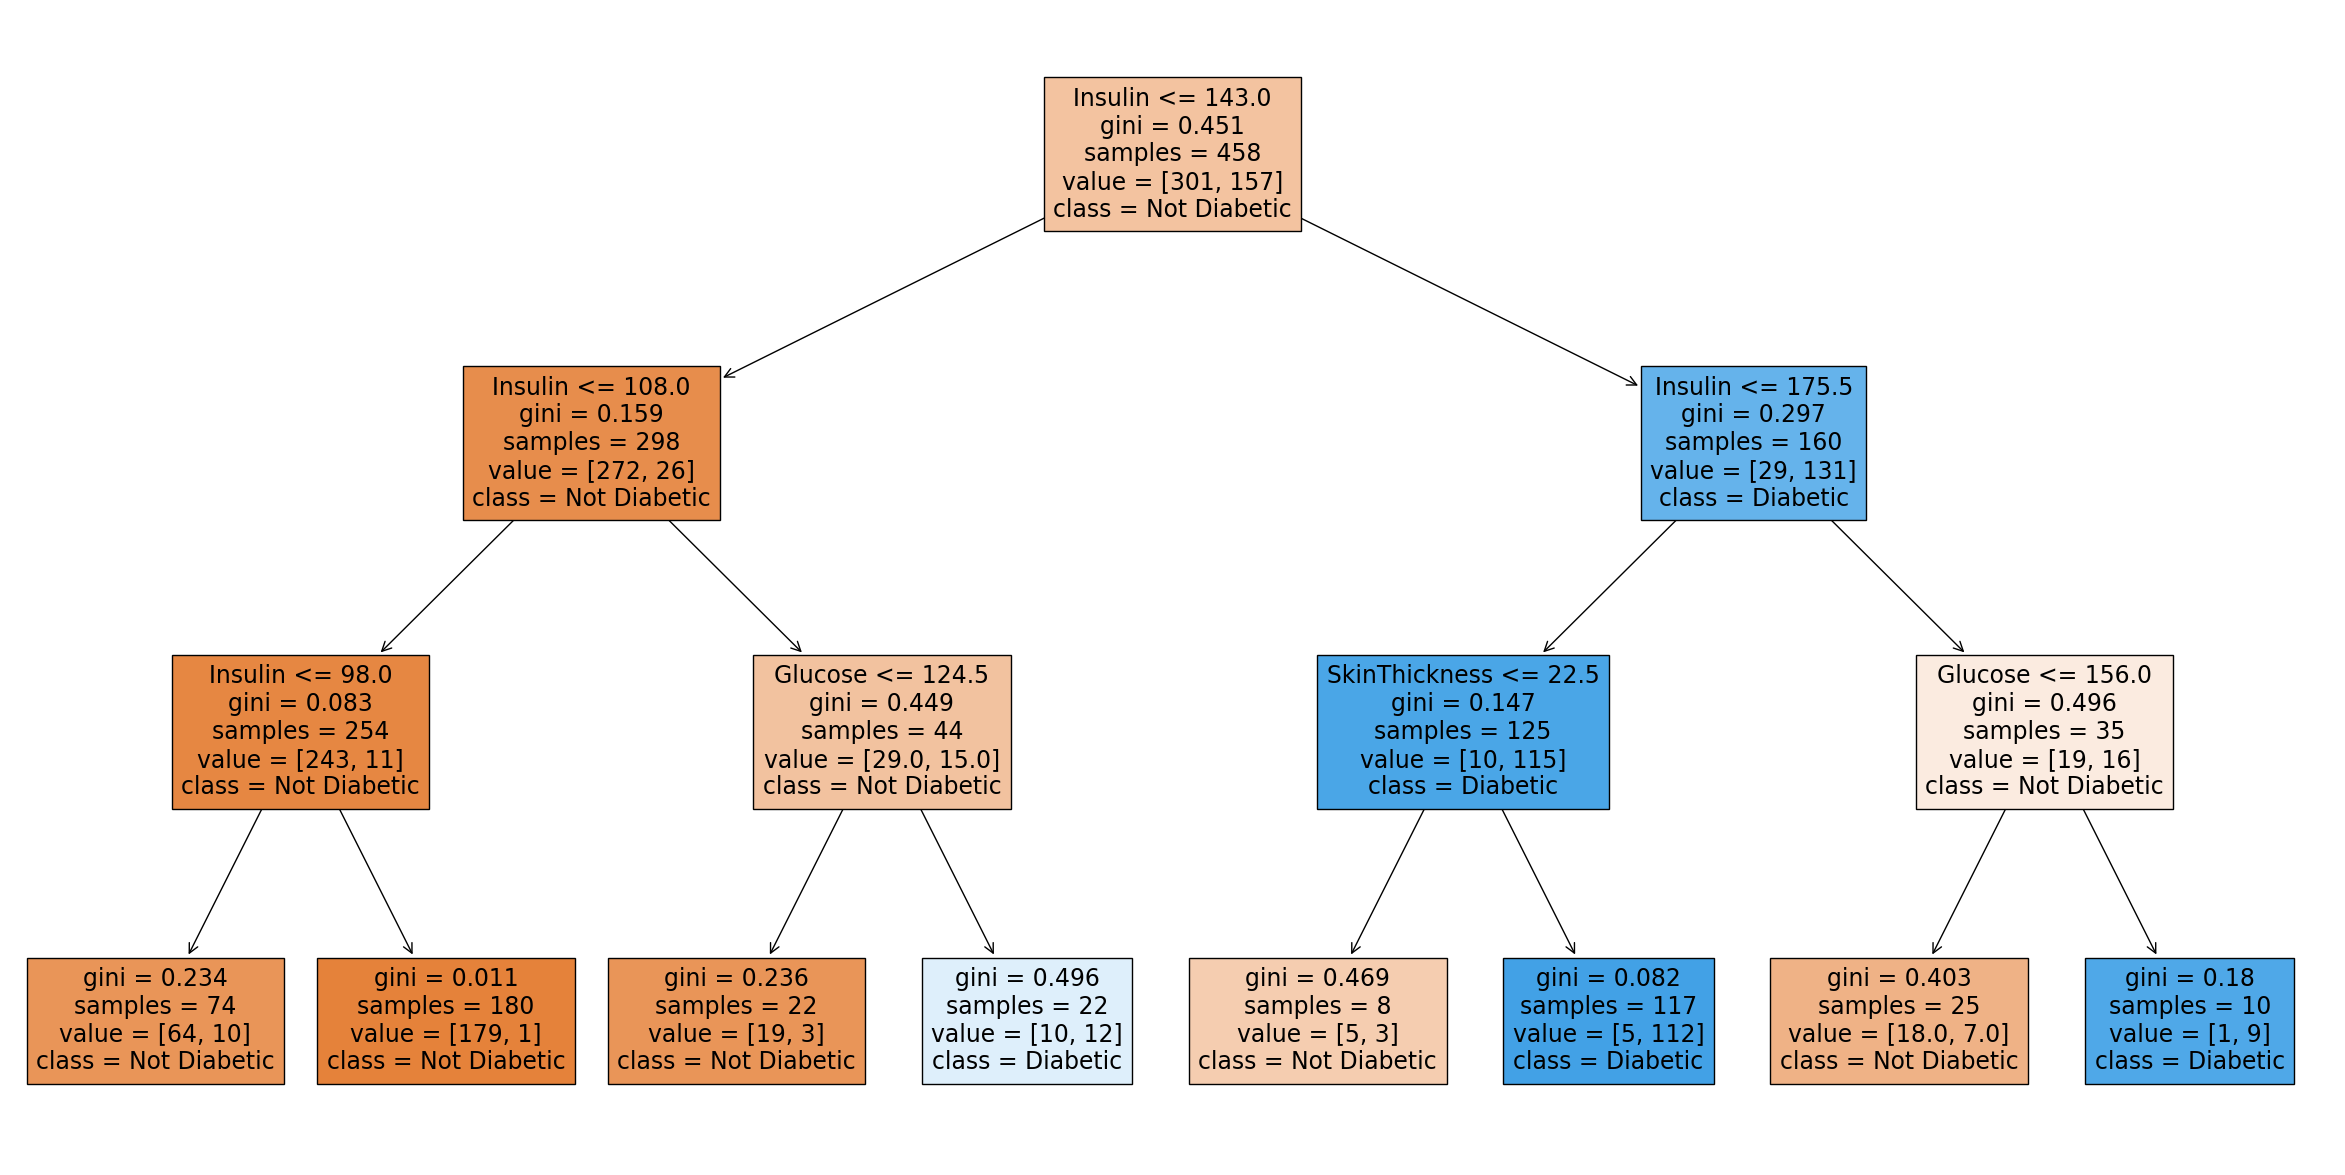

In [48]:
plt.figure(figsize=(30, 15))
plot_tree(DecisionTree, filled=True, feature_names=X_train.columns, class_names=['Not Diabetic', 'Diabetic'])